<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML11_Regresja_drzew_decyzyjnych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)

#Wygenerowanie danych

In [ ]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(f'{data[:5]}\n')
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


#Regresja liniowa

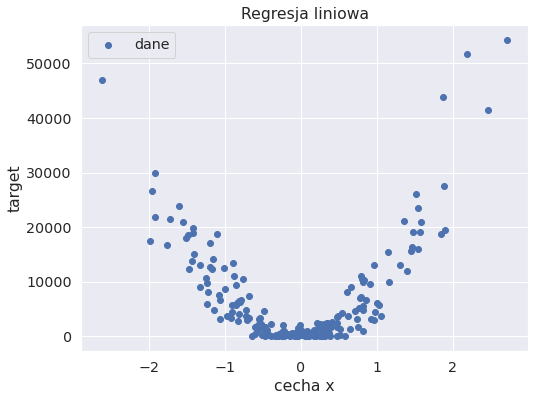

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

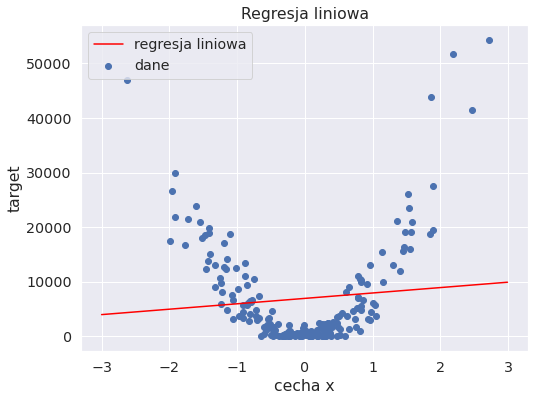

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.plot(plot_data, regressor.predict(plot_data), c='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

#Regresja drzew decyzyjnych

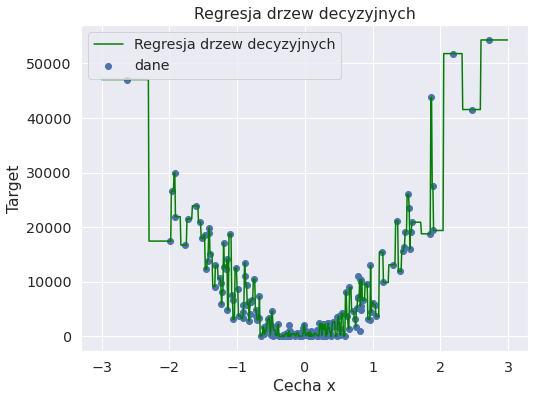

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label=f'Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('Cecha x')
plt.ylabel('Target')
plt.show()

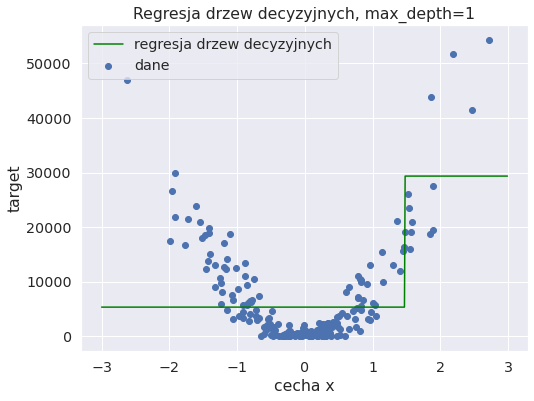

In [ ]:
max_depth = 1
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title(f'Regresja drzew decyzyjnych, max_depth={max_depth}')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

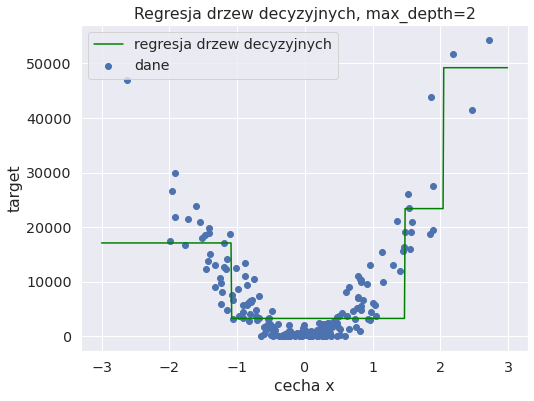

In [ ]:
max_depth = 2
regressor = DecisionTreeRegressor(max_depth=max_depth)
regressor.fit(data, target)

plt.figure(figsize=(8, 6))
plt.title(f'Regresja drzew decyzyjnych, max_depth={max_depth}')
plt.plot(plot_data, regressor.predict(plot_data), c='green', label='regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

#Graf drzewa decyzyjnego

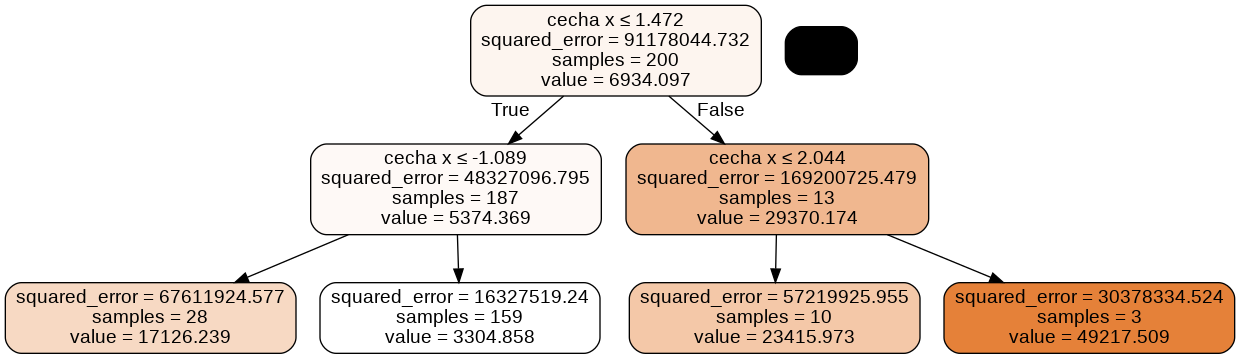

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

#Model drzewa decyzyjnego

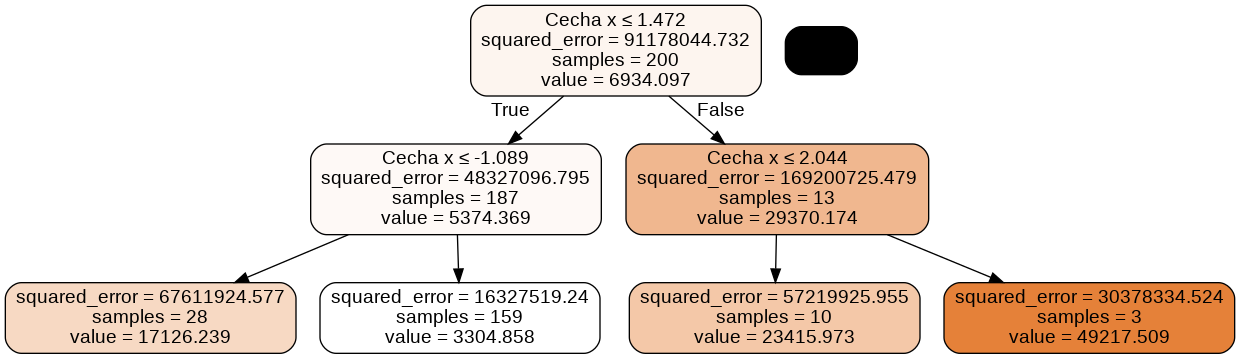

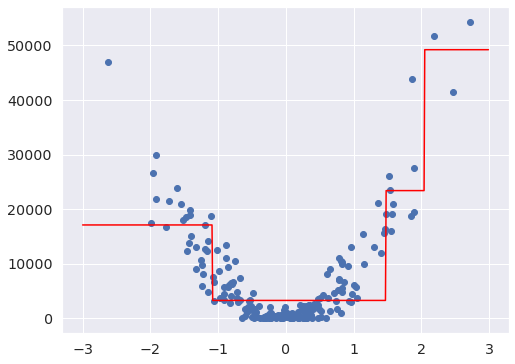

In [ ]:
def make_dt_reg(max_depth=2):
  regressor = DecisionTreeRegressor(max_depth=max_depth)
  regressor.fit(data, target)

  plt.figure(figsize=(8, 6))
  plt.plot(plot_data, regressor.predict(plot_data), c='red')
  plt.scatter(data, target)

  dot_data=StringIO()
  export_graphviz(regressor, out_file=dot_data,
                  filled=True, rounded = True,
                  special_characters=True,
                  feature_names=['Cecha x'])
  graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('graph.png')

  return Image(graph.create_png(), width=300 + max_depth*100)

make_dt_reg(max_depth=2)